<a href="https://colab.research.google.com/github/Sruthi-Shivaram/Ml_Minor/blob/main/Expt_2_Regression/ML_2_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Sruthi Shivaramakrishnan

UID: 2019110059

Branch: ETRX

Course: Machine Learning Minor

Case studies to consider: 

1) Predict a car's fuel economy from its physical parameters such as weight and engine size and 
power

2) Estimating horse fatalities from colic- use logistic regression to try to predict if a horse with 
colic will live or die

3) Credit Score prediction – a Model to predict the probabilities of default. Use Linear Regression 
to predict the probabilities of default and assign credit to potential borrowers 
(Dataset:CreditScore_test.csv)

Outcomes: 
1. To learn how to define, fit, and use a model in Python
2. To interpret the results
System Requirements: Linux/MaC/Windows OS with Anconda platform with Pandas, numpy, scipy, matplotlib, seaborn and scikit-learn ML library.




Part-A: Simple linear regression and Multiclass linear regression with data preprocessing 
(Handling NA values)
Use the case study relevant csv and files to build the models and evaluate the models.

# Load the dataset (Use pandas )

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/CreditScore_train.csv')

In [ ]:
data.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,807.0
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318.0,0.8417,1.0,1.0,1.0,0.0,NaN,0.0,NaN,819.0
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,803.0
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,530.0
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413.0,1.0180,1.0,1.0,1.0,0.0,NaN,0.0,NaN,485.0


In [ ]:
data.info

<bound method DataFrame.info of           x001   x002   x003   x004   x005  x006  x007  x008  x009  x010  ...  \
0      1084094  426.0   39.0  128.0  426.0     0     0     0     0     0  ...   
1      1287777  160.0    2.0   64.0  160.0     1     1     2     0     1  ...   
2      1483016  163.0   16.0  104.0  239.0     0     0     0     1     0  ...   
3       959054    NaN    NaN    NaN  102.0     0     0     0     0     0  ...   
4      1342113    3.0    2.0    2.0   62.0     0     2     2     0     0  ...   
...        ...    ...    ...    ...    ...   ...   ...   ...   ...   ...  ...   
25273  1154760    NaN    NaN    NaN  248.0     1     0     0     1     0  ...   
25274  1462755  342.0   49.0  158.0  342.0     1     0     0     1     2  ...   
25275   787658   24.0    0.0   12.0  100.0     0     2     2     6     2  ...   
25276  1164063    NaN    NaN    NaN    9.0     1     0     1     0     0  ...   
25277  1413423  110.0  110.0  110.0  110.0     1     0     1     1     3  ...

In [ ]:
data.describe()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
count,2.527800e+04,19923.000000,19923.000000,19925.000000,23717.000000,25278.000000,25278.000000,25278.000000,25278.000000,25278.000000,...,2.527700e+04,10619.000000,25277.000000,25277.000000,25277.000000,25277.000000,6794.000000,25277.000000,4591.000000,25277.000000
mean,1.218435e+06,125.731918,25.685840,65.399297,178.616393,0.314780,0.692895,1.385632,1.220745,1.044861,...,1.187786e+04,0.796189,0.547494,0.561340,0.585592,0.105946,2.959965,6383.431064,1.037576,619.847213
std,2.739335e+05,115.388567,48.707859,62.834499,124.689766,0.464437,1.356659,2.272709,2.147655,1.742868,...,3.281392e+04,0.280289,0.497749,0.496233,0.492629,0.307775,2.131242,23701.355938,0.337484,118.385155
min,1.857000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,300.000000
25%,9.749938e+05,32.000000,3.000000,19.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.642600,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.971900,524.000000
50%,1.236746e+06,100.000000,8.000000,48.000000,151.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000e+00,0.851900,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.048000,600.000000
75%,1.447942e+06,180.000000,24.000000,92.000000,246.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,1.311600e+04,0.981750,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,1.191450,720.000000
max,1.677197e+06,713.000000,704.000000,704.000000,745.000000,1.000000,28.000000,56.000000,78.000000,33.000000,...,2.000000e+06,4.597400,1.000000,1.000000,1.000000,1.000000,9.000000,653210.000000,4.675900,839.000000


In [ ]:
data.shape

(25278, 305)

In [ ]:
data.nunique()

x001    25278
x002      601
x003      363
x004      395
x005      661
        ...  
x301        2
x302        7
x303     4337
x304     3269
y         525
Length: 305, dtype: int64

# Data Preprocessing (Handling NA values)

In [ ]:
data.isnull().sum()

x001        0
x002     5355
x003     5355
x004     5353
x005     1561
        ...  
x301        1
x302    18484
x303        1
x304    20687
y           1
Length: 305, dtype: int64

In [ ]:
null_percentage = data.isnull().sum()/data.shape[0]*100

# Below code gives list of columns having more than 60% null
col_to_drop = null_percentage[null_percentage>50].keys()

output_data = data.drop(col_to_drop, axis=1)

The above drops columns having more than 50% null values in the dataset.

In [ ]:
output_data

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0.0,346762.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,807.0
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318.0,124634.0,0.0,17318.0,1.0,1.0,1.0,0.0,0.0,819.0
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,803.0
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,530.0
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413.0,17413.0,0.0,17413.0,1.0,1.0,1.0,0.0,0.0,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25273,1154760,NaN,NaN,NaN,248.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488.0
25274,1462755,342.0,49.0,158.0,342.0,1,0,0,1,2,...,0.0,76173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,812.0
25275,787658,24.0,0.0,12.0,100.0,0,2,2,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,454.0
25276,1164063,NaN,NaN,NaN,9.0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,445.0


In [ ]:
output_data.isnull().sum()

x001       0
x002    5355
x003    5355
x004    5353
x005    1561
        ... 
x299       1
x300       1
x301       1
x303       1
y          1
Length: 286, dtype: int64

In [ ]:
newdf = output_data.fillna(0)
newdf

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0.0,346762.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,807.0
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318.0,124634.0,0.0,17318.0,1.0,1.0,1.0,0.0,0.0,819.0
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,803.0
3,959054,0.0,0.0,0.0,102.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,530.0
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413.0,17413.0,0.0,17413.0,1.0,1.0,1.0,0.0,0.0,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25273,1154760,0.0,0.0,0.0,248.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488.0
25274,1462755,342.0,49.0,158.0,342.0,1,0,0,1,2,...,0.0,76173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,812.0
25275,787658,24.0,0.0,12.0,100.0,0,2,2,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,454.0
25276,1164063,0.0,0.0,0.0,9.0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,445.0


The null values have been replaced by adding zeroes in the attribute values.

# Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib 

In [ ]:
import matplotlib.pyplot as plt
correlation=output_data.corr()
correlation


,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
x001,1.000000,0.087451,0.021460,0.080943,0.109081,0.001299,0.009731,-0.046124,-0.040478,-0.004195,...,0.019722,0.059627,-0.009053,0.025128,0.011027,0.011638,0.008255,-0.025908,0.003586,0.160164
x002,0.087451,1.000000,0.285024,0.827179,0.752436,0.119224,-0.134821,-0.158586,-0.076813,-0.020450,...,0.047117,0.223901,-0.028529,0.062706,-0.126905,-0.127784,-0.128426,-0.083842,0.005918,0.486504
x003,0.021460,0.285024,1.000000,0.702288,0.218931,0.239272,-0.268322,-0.295019,-0.202166,-0.166687,...,-0.135993,-0.081524,-0.025673,-0.136562,-0.305044,-0.303312,-0.299373,-0.010565,-0.061496,0.121954
x004,0.080943,0.827179,0.702288,1.000000,0.629443,0.229497,-0.277334,-0.318719,-0.206602,-0.142391,...,-0.045658,0.106869,-0.022898,-0.039977,-0.270582,-0.269884,-0.267814,-0.054198,-0.018682,0.420956
x005,0.109081,0.752436,0.218931,0.629443,1.000000,0.127400,-0.059274,-0.072995,-0.026469,0.028719,...,0.050589,0.211757,-0.032344,0.068132,-0.069064,-0.071024,-0.074855,-0.097612,-0.016027,0.579136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x299,0.011638,-0.127784,-0.303312,-0.269884,-0.071024,-0.001892,0.221204,0.268536,0.276178,0.279574,...,0.361976,0.134545,0.184307,0.318783,0.972362,1.000000,0.951626,0.148362,0.236734,-0.045241
x300,0.008255,-0.128426,-0.299373,-0.267814,-0.074855,0.001908,0.212595,0.261299,0.274447,0.278464,...,0.344923,0.134640,0.175554,0.303793,0.925325,0.951626,1.000000,0.154942,0.225541,-0.043710
x301,-0.025908,-0.083842,-0.010565,-0.054198,-0.097612,-0.003019,0.005719,0.011608,0.017825,0.017338,...,0.152482,-0.024312,0.224783,0.074493,0.145607,0.148362,0.154942,1.000000,0.252252,-0.224338
x303,0.003586,0.005918,-0.061496,-0.018682,-0.016027,-0.009128,0.084139,0.096418,0.117302,0.135990,...,0.690257,0.163374,0.477822,0.556541,0.243169,0.236734,0.225541,0.252252,1.000000,-0.037304


In [ ]:
correlation_mat = output_data.corr()
corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

y     x041   -0.685479
x041  y      -0.685479
y     x057   -0.644333
x057  y      -0.644333
y     x058   -0.582751
                ...   
x196  x196    1.000000
x197  x197    1.000000
x198  x198    1.000000
x192  x192    1.000000
y     y       1.000000
Length: 4818, dtype: float64


In [ ]:
datan=newdf.drop(['y'],axis=1)
datan

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x290,x291,x292,x294,x296,x298,x299,x300,x301,x303
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0.0,0.0,346762.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,5.5,17318.0,124634.0,0.0,17318.0,1.0,1.0,1.0,0.0,0.0
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,959054,0.0,0.0,0.0,102.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,2.0,17413.0,17413.0,0.0,17413.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25273,1154760,0.0,0.0,0.0,248.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25274,1462755,342.0,49.0,158.0,342.0,1,0,0,1,2,...,0.0,0.0,76173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25275,787658,24.0,0.0,12.0,100.0,0,2,2,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25276,1164063,0.0,0.0,0.0,9.0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Applying PCA on the dataset

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=240)
principalComponents = pca.fit_transform(datan)

col_name=[]

for i in range(240):
      col_name.append('princi   '+str(i))
principalDf = pd.DataFrame(data = principalComponents
             , columns = col_name)

The data size is huge hence PCA has been applied to reduce the data size and computation power.

In [ ]:
principalDf

,princi 0,princi 1,princi 2,princi 3,princi 4,princi 5,princi 6,princi 7,princi 8,princi 9,...,princi 230,princi 231,princi 232,princi 233,princi 234,princi 235,princi 236,princi 237,princi 238,princi 239
0,892189.298965,209599.976296,102109.124382,-35690.000299,-94413.866264,-56198.477109,-6145.320872,-7687.808459,40038.909820,-39857.589671,...,-0.000890,-0.003792,-0.025571,0.001703,-0.003790,-0.002248,0.017838,-0.001117,-0.002403,-0.000753
1,141224.314344,-57395.624446,-15658.445395,-19462.438434,-5335.578947,819.122017,-15453.543671,1431.929135,490.997690,13284.756182,...,-0.001760,0.006694,0.015683,-0.004543,0.007155,0.003829,0.002703,0.003246,0.001786,0.000142
2,-112584.940150,-275339.878638,2602.916920,-8923.770370,-19809.496270,-4111.988095,-2557.199752,-1250.356969,-1218.778531,-35.928742,...,-0.001950,-0.003707,0.003292,0.000389,0.002631,-0.000540,-0.002166,-0.001496,0.001115,-0.000423
3,-161078.372637,246781.753727,-6958.298090,-9530.452670,-15475.090149,877.198858,10986.549000,-2465.591950,2079.940162,-4070.586175,...,-0.009055,-0.002345,-0.011371,-0.008373,-0.003288,0.000171,0.000589,0.001423,-0.000753,-0.000519
4,-86052.957652,-131131.154756,-13066.316174,-4681.753879,16401.785824,-232.977643,13660.004607,20132.997115,7824.589244,4207.144152,...,0.001289,-0.002332,0.005552,0.005644,-0.004141,0.003658,0.007402,-0.001090,0.004292,-0.004292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25273,-132976.942666,52528.026386,4889.559862,2447.153162,-13901.113885,8135.056093,17110.204332,18197.690956,-351.850727,1244.584771,...,-0.025381,0.007413,0.000106,0.003710,-0.010691,0.010321,0.001615,0.004611,-0.000740,-0.000025
25274,56536.090316,-240356.201144,-10309.748350,-15040.366535,-27788.210197,-4908.953739,-6466.808684,-595.414633,-4497.833914,2067.469649,...,-0.000647,0.008572,0.017347,-0.004477,0.006673,0.000891,0.006272,0.000454,0.002595,0.000765
25275,-172089.818834,417793.914576,-1683.401123,-7701.732998,-14943.978110,-1868.935371,9963.822482,-1196.212276,1798.240797,-2906.455752,...,0.010340,-0.029828,-0.043342,0.004217,0.015390,0.001491,-0.000624,-0.009299,-0.006918,-0.001628
25276,-143726.386322,42541.107841,-9991.275610,-10099.330084,-15139.786212,1285.578708,12548.960632,-2639.879835,2311.827629,-4708.791242,...,0.653338,-0.022892,0.004605,-0.150830,-0.011521,-0.014123,-0.025186,0.068039,0.003999,0.008755


# Data Partition (80% for training and 20% for testing) (Use scikit-learn),Build the model (use scikit learn),Summarize the model,Prediction,Evaluate the model,Tuning the model

Coefficients:  [ 8.00591549e-05 -5.64894311e-05  1.44554301e-04 -1.50728480e-04
 -2.34003078e-04  6.59034158e-05 -1.00133661e-03 -2.23844031e-04
 -1.88563483e-04  1.67347166e-03 -2.47453247e-03 -4.05480912e-04
  1.30933045e-03 -1.19209172e-03 -1.17202563e-03 -2.67539589e-03
  5.46025923e-03 -8.73207168e-04  1.31395195e-03  2.14734213e-03
 -1.28137534e-02  1.90651069e-01  1.24339669e-01  1.38083490e-01
  7.87395350e-02 -2.73703665e-01 -1.09369043e-01  4.63697914e-02
  1.03070889e-01 -6.80029850e-02  2.18426444e-01  3.73065176e-01
  5.76715030e-01 -1.49030490e+00 -1.72082299e+00 -8.06087510e-01
  1.75429200e+00  2.40697485e+00  3.44735746e-01  6.47149670e-01
 -2.46943433e-01  1.44693983e+00 -6.46512359e-01 -9.05121795e-01
 -2.74084701e-01  1.13942683e+00 -3.86696631e+00 -2.57900913e-01
  4.02272915e-02 -3.04583375e+00  4.37024506e-02  3.62325756e+00
 -1.94173342e-01  4.23650612e-01 -9.69039827e-02 -1.48117328e+00
 -1.78924420e+00 -3.99492373e+00 -1.97497811e+00 -8.91820389e-01
 -2.193634

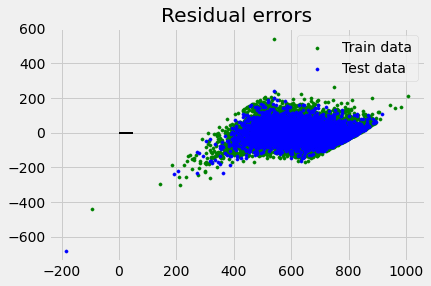

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
  

X = principalDf
y = newdf['y']
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=1)
  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

The above shows the regression model aaplied on the PCA applied dataset. It shows R2 score of 0.8427.

Coefficients:  [ 6.86500591e-06 -7.83261176e-02 -1.48132263e-01  2.99714402e-01
  1.31470870e-01 -3.11117348e+00  3.43936530e-01 -4.39137187e+06
 -4.39137143e+06 -4.39137251e+06 -4.39137204e+06 -4.39137201e+06
 -4.39137202e+06 -4.39137231e+06  3.44785765e+07 -3.00872023e+07
 -3.00872075e+07  1.03648937e+00  1.86457898e+00  4.39709240e+00
 -4.62868749e+00  9.66949209e+00 -5.00593341e+00  3.98115860e+00
  4.83743629e+00  1.38794992e+01  9.42211002e+00 -9.22157796e-01
 -5.86868857e-01  4.36988909e-01  3.26193544e-01  1.82265660e+00
  2.96243322e-01 -6.46416222e-01  2.84692716e-01 -3.68121608e+00
 -3.01400458e+00  1.81644552e+00  9.33476819e-01 -1.41814410e+00
 -2.89254071e+01 -1.30754430e-04  1.45537779e-04 -4.70923260e-06
  2.17074528e-03  1.14125543e+00 -8.92174738e-02 -7.23292618e-01
 -1.80693873e+00 -4.18517324e-01 -3.77413182e+00 -2.56860634e+00
 -3.10400118e+00 -2.46453139e+00 -7.87923126e+00 -3.61622595e+00
 -2.57226248e+01 -2.45755183e+01 -7.64906983e+00 -6.97278983e+00
 -2.820527

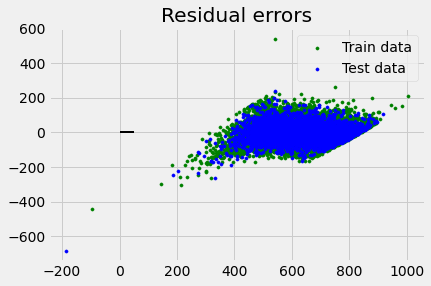

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
  
# load the boston dataset
  
# defining feature matrix(X) and response vector(y)
X = datan
y = newdf['y']
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=1)
  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

The above shows the regression model aaplied on the normal dataset. It shows R2 score of 0.84236.

Results:
1. The null values in the data set have been handled by replacing them with 0.
2. PCA is dimensionality reduction technique used to reduce the dimensions of the data.
3. The R2 score on the original dataset is 0.8423 whereras on the reduced dimensionality dataset is 0.8427.
4. PCA increased the R2 score by a marginal value but reduced the computational power of the model to a large extent.
